# Importação das bibliotecas a serem utilizadas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, kelbow_visualizer, silhouette_visualizer

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from ipywidgets import interact, FloatSlider, IntSlider

# Etapa 01) Análise exploratória dos dados

In [52]:
# Importação da base de dados
df = pd.read_csv('/content/data.csv', encoding='windows-1252')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [53]:
# Verificando o formato do dataset
df.shape

(541909, 8)

In [54]:
# Verificando o tipo das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [55]:
# Verificando os valores nulos
df.isna().sum().sort_values(ascending=False)

,0
CustomerID,135080
Description,1454
StockCode,0
InvoiceNo,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [56]:
# Verificando os valores duplicados
df.duplicated().sum()

np.int64(5268)

In [57]:
# Verificando a presença de outliers
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [58]:
#Verificando a distribuição dos dados da variável 'Country'
df['Country'].value_counts()

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


In [59]:
#Verificando a distribuição proporcional dos dados da variável 'Country'
df['Country'].value_counts(normalize=True) * 100

,proportion
Country,
United Kingdom,91.431956
Germany,1.752139
France,1.579047
EIRE,1.512431
Spain,0.467422
Netherlands,0.437527
Belgium,0.381798
Switzerland,0.369435
Portugal,0.280305


## Relatório Etapa 01

**1. Contexto Geral**

O conjunto de dados analisado contém 541.909 registros e 8 variáveis referentes a transações comerciais, de um e-commerce internacional.

**1.1 Formato do dataset**: (541.909, 8)

**1.2 Tipos de dados**:
*   5 colunas do tipo object
*   1 coluna int64 (Quantity)
*   2 colunas float64 (UnitPrice, CustomerID)

**2. Valores Nulos**:

|         Coluna | Valores Nulos | % do Total |
| -------------: | :-----------: | :--------: |
|     CustomerID |    135.080    |    24,9%   |
|    Description |     1.454     |    0,27%   |
| Outras colunas |       0       |     0%     |

**2.1 Conclusão**:

*   A ausência de CustomerID em cerca de 25% dos registros pode impactar análises relacionadas a comportamento de clientes, exigindo tratamento (remoção, imputação ou análise separada).

**3. Duplicatas**

**3.1 Registros duplicados**: 5.268

**3.2 Conclusão**

*   Representam cerca de 0,97% do total. Esses registros devem ser removidos ou analisados para verificar se representam erros de sistema ou vendas repetidas.

**4. Estatísticas Descritivas**
|     Métrica    |   Quantity    |  UnitPrice |
| -------------: | :-----------: | :--------: |
|     Média	     |     9,55      |    4,61    |        
|  Desvio Padrão |    218,08     |   96,76    |
|     Mínimo     |    80.995     | -11.062,06 |
|     Máximo     |    80.995     |  38.970,00 |

**4.1 Análise**:

*   Existem valores negativos em Quantity e UnitPrice, indicando devoluções (quantidades negativas) ou erros de entrada.

*   A alta dispersão e amplitude sugerem a presença de outliers significativos, que podem distorcer médias e afetar modelos de clusterização.

**5. Distribuição por país**

| País               | Nº de Registros | % do Total |
| ------------------ | --------------: | ---------: |
| United Kingdom     |         495.478 | **91,43%** |
| Alemanha           |           9.495 |      1,75% |
| França             |           8.557 |      1,58% |
| Irlanda (EIRE)     |           8.196 |      1,51% |
| Espanha            |           2.533 |      0,47% |
| Outros (32 países) |         ~17.650 |     ~3,26% |

**5.1 Conclusão**:

*   O dataset é fortemente dominado pelo Reino Unido, o que indica que o comércio é concentrado neste mercado. Países como Alemanha, França e Irlanda aparecem em menor escala.

**6. Observações**

*   Dados nulos e duplicados precisam de tratamento antes das próximas etapas.

*   Outliers e valores negativos nas variáveis Quantity e UnitPrice exigem atenção — possivelmente indicam devoluções, cancelamentos ou erros.

*   A distribuição geográfica altamente desigual sugere que análises de segmentação ou clusterização devem ser realizadas por país ou com amostragem balanceada, para evitar viés.

*   O CustomerID ausente em ¼ dos dados limita análises de comportamento individual, como RFM ou fidelização.

# Etapa 02) Pré-processamento dos dados



In [60]:
#Removendo os valores nulos
df = df.dropna(subset=['CustomerID'])

In [61]:
#Verificando a remoção dos valores nulos
df.isna().sum().sort_values()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [62]:
# Convertendo a coluna 'InvoiceDate' para datetime
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M').copy()

/tmp/ipython-input-2109235076.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
# Convertendo a coluna 'CustomerID' para int
df['CustomerID'] = df['CustomerID'].astype(int).copy()

/tmp/ipython-input-4022144184.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
# Convertendo a coluna 'Country' para category
df['Country'] = df['Country'].astype('category').copy()

/tmp/ipython-input-300886068.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
# Checando as conversões
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 25.2+ MB


In [66]:
# Removendo valores negativos das colunas 'Quantity' e 'UnitPrice'
menores_0 = df[['Quantity','UnitPrice']].le(0).any(axis=1)
df = df[~menores_0]

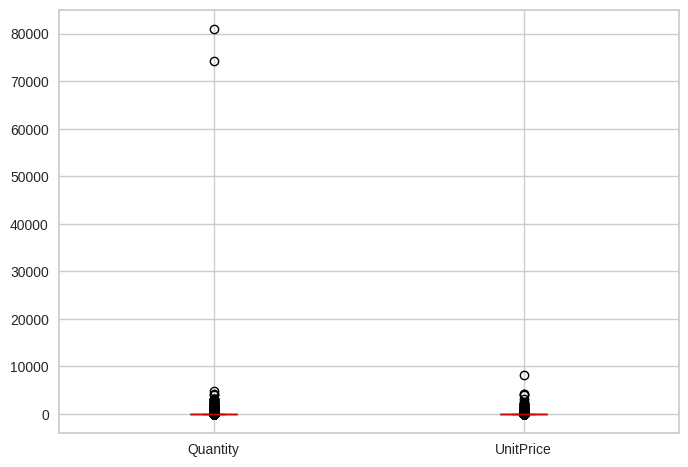

In [67]:
# Verificando os outliers das colunas 'Quantity' e 'UnitPrice'
df[['Quantity','UnitPrice']].plot.box()
plt.show()

In [68]:
# Removendo valores maiores que 10.000 da coluna 'Quantity'
df = df.query('Quantity<10_000')

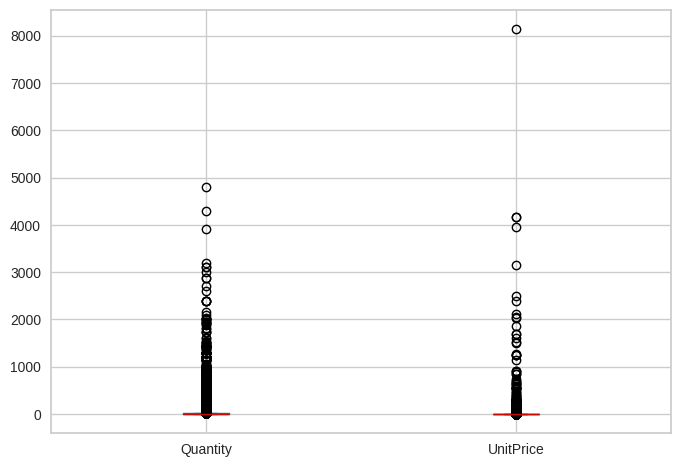

In [69]:
# Checando novamente os outliers
df[['Quantity','UnitPrice']].plot.box()
plt.show()

In [70]:
# Removendo valores maiores que 8.000 da coluna 'UnitPrice'
df = df.query('UnitPrice<8_000')

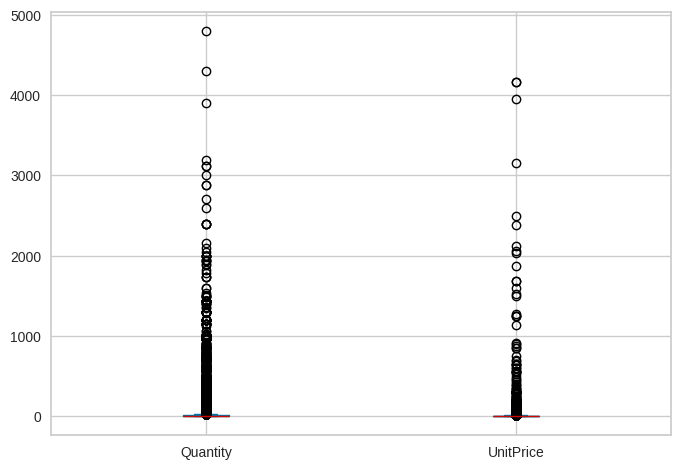

In [71]:
# Checando novamente os outliers
df[['Quantity','UnitPrice']].plot.box()
plt.show()

In [72]:
# Criando a variável 'Price_total'
df['price_total'] = df.Quantity * df.UnitPrice
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [73]:
# Criando as métricas RFM
df_rfm = (
  df.groupby('CustomerID')
  .agg(
      R = ('InvoiceDate', lambda x: (pd.Timestamp('2012-01-01') - x.max()).days),
      F = ('InvoiceNo', 'nunique'),
      M = ('price_total', 'mean')
  )
)

df_rfm

,R,F,M
CustomerID,,,
12347,24,7,23.681319
12348,97,4,57.975484
12349,40,1,24.076027
12350,332,1,19.670588
12352,58,8,29.482824
...,...,...,...
18280,299,1,18.060000
18281,202,1,11.545714
18282,29,2,14.837500


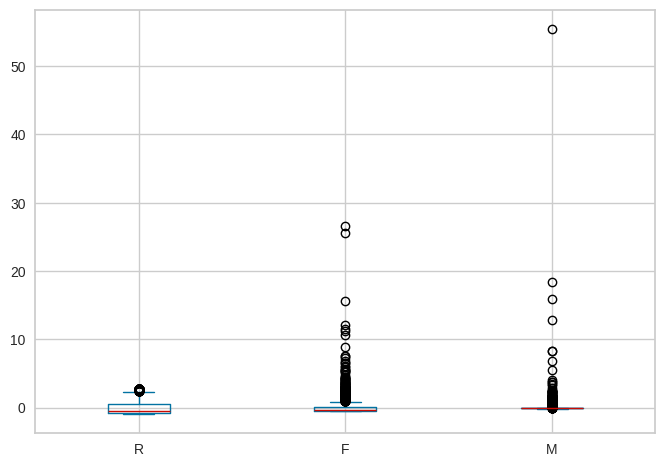

In [74]:
# Checando possíveis outliers nos dados de RFM
df_rfm.apply(scale).plot.box()
plt.show()

In [75]:
# Checando os clientes com a métrica monetária maior que 50
df_rfm.apply(scale).query('M>50')

,R,F,M
CustomerID,,,
15098,0.899878,-0.165317,55.434876


In [76]:
# Checando quantas compras foram realizadas pelo cliente '15098'
df.query('CustomerID==15098')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price_total
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098,United Kingdom,297.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098,United Kingdom,649.5


In [77]:
# Removendoo cliente '15098'
df_rfm = df_rfm.drop(15098)

In [78]:
# Normalizando os dados
df_rfm_clip = df_rfm.apply(lambda x: x.clip(upper=x.quantile(0.95)))
df_rfm_clip_scaled = df_rfm_clip.apply(scale)

## Relatório Etapa 02

**1. Objetivo**

*   O objetivo do pré-processamento foi preparar a base de dados para o cálculo das métricas RFM (Recência, Frequência e Valor Monetário) e posterior aplicação de modelos de clusterização sobre o comportamento de compra dos clientes.

**2. Tratamento de valores nulos**

*   A coluna CustomerID apresentava valores ausentes (≈ 25% da base).

*   Foram removidas todas as linhas com CustomerID nulo, pois essa informação é essencial para identificar cada cliente.

**2.1 Resultado**:
O dataset passou de 541.909 para 406.829 registros após essa limpeza.

**3. Conversão de tipos de dados**

Para padronizar o formato das colunas e facilitar operações numéricas e temporais, foram realizadas as seguintes conversões:

|        Coluna | Tipo Original |     Novo Tipo    | Motivo                                            |
| ------------: | :-----------: | :--------------: | :------------------------------------------------ |
| `InvoiceDate` |    `object`   | `datetime64[ns]` | Permitir cálculos de datas (ex: recência).        |
|  `CustomerID` |   `float64`   |      `int64`     | Melhorar precisão e reduzir memória.              |
|     `Country` |    `object`   |    `category`    | Otimizar uso de memória e facilitar agrupamentos. |

**4. Remoção de valores inválidos e outliers**
*   Valores negativos: Foram removidos registros com valores negativos nas colunas Quantity e UnitPrice, pois representam devoluções ou erros de registro.

*   Valores extremos: Para evitar distorções na análise, foram aplicados filtros adicionais:

    Quantity < 10.000

    UnitPrice < 8.000

    Após essas remoções, foram gerados boxplots que confirmaram a eliminação dos principais outliers.

**4.1 Efeito**: A distribuição das variáveis ficou mais estável, com maior representatividade do comportamento típico dos clientes.

**5. Criação da variável price_total**

Foi criada uma nova coluna calculando o valor total gasto em cada transação, essa variável foi usada para o cálculo da métrica Monetária (M) do modelo RFM.

**6. Cálculo das métricas RFM**

Com a base limpa, foi criado o DataFrame df_rfm agrupando as compras por cliente (CustomerID).

*   Resultado:

    Total de clientes analisados: 4.337

    Colunas:

    R → Recência (dias desde a última compra até 01/01/2012)

    F → Frequência (número de faturas únicas)

    M → Valor monetário médio das compras

    Exemplo de saída:

    | CustomerID |   R |  F |     M |
    | ---------- | --: | -: | ----: |
    | 12347      |  24 |  7 | 23.68 |
    | 12348      |  97 |  4 | 57.97 |
    | 12349      |  40 |  1 | 24.08 |
    | 12350      | 332 |  1 | 19.67 |
    | 12352      |  58 |  8 | 29.48 |

**7. Tratameto pós-RFM**

Durante a inspeção do DataFrame df_rfm, foi identificado o cliente 15098 com valor monetário extremamente alto (M ≈ 55.4 após padronização).

Após análise das transações, confirmou-se que esse cliente possuía valores anômalos de compra, como itens com preços unitários próximos de R$ 38.970, distorcendo a escala dos dados.

**8. Normalização dos dados**

Para eliminar o impacto de valores extremos e tornar as três métricas comparáveis, foi aplicada a seguinte estratégia:

*  Corte de outliers até o percentil 95: Essa operação limita os valores muito altos (acima do 95º percentil) sem excluir dados, mantendo a integridade da amostra.

*  Normalização com scale(): A função scale() aplica a padronização z-score em cada coluna (R, F, M), deixando-as com:

    Média ≈ 0

    Desvio padrão ≈ 1

**8.1 Conclusão**

Após o corte e normalização, todas as métricas estão na mesma escala e sem outliers dominantes, criando condições ideais para aplicar algoritmos de clusterização baseados em distância (como o K-Means).

**9. Conclusões da Etapa 02**

A base está limpa, padronizada e pronta para modelagem.
Os principais objetivos do pré-processamento foram alcançados:

*  Remoção de ruídos e inconsistências (nulos, negativos e outliers);

*  Conversão correta dos tipos de dados;

*  Criação da variável de valor total (price_total);

*  Construção do DataFrame df_rfm, que servirá de entrada para os algoritmos de clusterização.
*  A retirada de outliers e a normalização dos dados garantem maior equilíbrio entre as dimensões comportamentais (R, F e M).

# Etapa 03) Selecione um algoritmo de clusterização

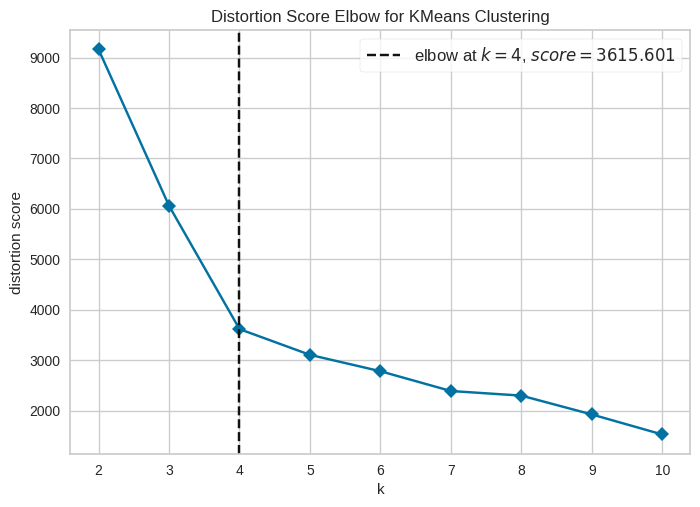

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [79]:
# Utilizando Elbow para descobrir o número ideal de Clusters para o KMeans
kelbow_visualizer(KMeans(), df_rfm_clip_scaled, k=10, timings=False)

In [80]:
# Checando o Silhouette Score de diversos K para confirmar o número de Clusters
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_rfm_clip_scaled)
    score = silhouette_score(df_rfm_clip_scaled, labels)
    silhouette_scores.append({'k': k, 'Silhouette Score': score})
pd.DataFrame(silhouette_scores).set_index('k').style.background_gradient()

,Silhouette Score
k,
2,0.382311
3,0.435326
4,0.479553
5,0.484900
6,0.398087
7,0.376951
8,0.383636
9,0.394119
10,0.351639


In [81]:
# Implementando o KMeans para 4 Clusters
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(df_rfm_clip_scaled)

In [82]:
# Gerando o gráfico 3D para análise dos Clusters
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=kmeans_labels.astype(str), template='plotly_dark')

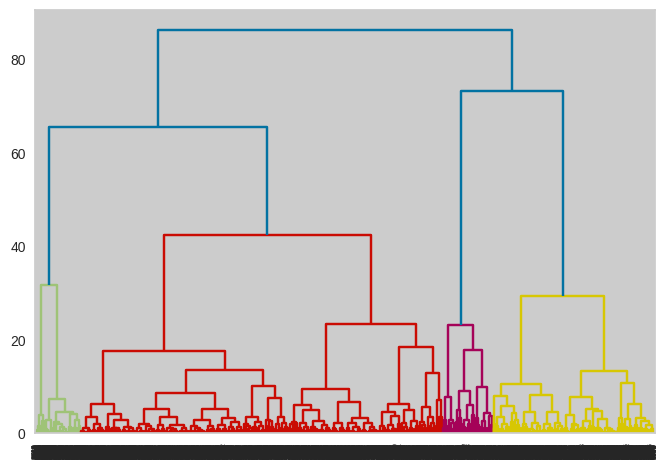

In [83]:
# Utilizando Dendrograma para descobrir o número ideal de Clusters para Clusterização Hierárquica
X = linkage(df_rfm_clip_scaled, method='ward')
dend_dict = dendrogram(X)
plt.show()

In [84]:
# Checando o Silhouette Score de diversos K para confirmar o número de Clusters
silhouette_scores = []

for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(df_rfm_clip_scaled)
    score = silhouette_score(df_rfm_clip_scaled, labels)
    silhouette_scores.append({'k': k, 'Silhouette Score': score})


pd.DataFrame(silhouette_scores).set_index('k').style.background_gradient()

,Silhouette Score
k,
2,0.361292
3,0.398928
4,0.431886
5,0.342136
6,0.348298
7,0.322680
8,0.287643
9,0.286883
10,0.298923


In [85]:
# Implementando a Clusterização Hierárquica para 4 Clusters
hclust = AgglomerativeClustering(n_clusters=4)
hclust_labels = hclust.fit_predict(df_rfm_clip_scaled)

In [86]:
# Gerando o gráfico 3D para análise dos Clusters
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=hclust_labels.astype(str), template='plotly_dark')

In [87]:
# Aplicando o DBSCAN
db = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
db_labels = db.fit_predict(df_rfm_clip_scaled)

n_clusters_db = len([l for l in set(db_labels) if l != -1])

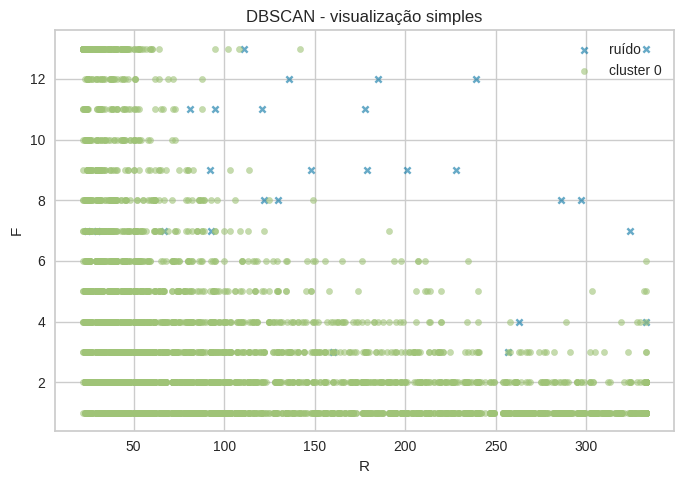

In [88]:
# Visualização simples do DBSCAN (usando as duas primeiras features R e F)
cols = df_rfm_clip.select_dtypes(include=[np.number]).columns.tolist()
if len(cols) >= 2:
    xcol, ycol = cols[0], cols[1]
    df_vis = df_rfm_clip.copy()
    df_vis['db_label'] = db_labels
    plt.figure(figsize=(7,5))
    for lab in sorted(df_vis['db_label'].unique()):
        subset = df_vis[df_vis['db_label'] == lab]
        lbl = 'ruído' if lab == -1 else f'cluster {lab}'
        marker = 'x' if lab == -1 else 'o'
        plt.scatter(subset[xcol], subset[ycol], label=lbl, marker=marker, s=20, alpha=0.6)
    plt.xlabel(xcol); plt.ylabel(ycol)
    plt.legend(); plt.title('DBSCAN - visualização simples'); plt.tight_layout(); plt.show()
else:
    print('Não há colunas suficientes para visualização simples.')


In [89]:
# Aplicando o Mean Shift
bandwidth = estimate_bandwidth(df_rfm_clip_scaled, quantile=0.2)
if bandwidth <= 0:
    bandwidth = estimate_bandwidth(df_rfm_clip_scaled, quantile=0.3)
print('Bandwidth estimada:', round(float(bandwidth),6))

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_labels = ms.fit_predict(df_rfm_clip_scaled)

n_clusters_ms = len(set(ms_labels))
print('MeanShift - número de clusters:', n_clusters_ms)
print('Contagem por label:', pd.Series(ms_labels).value_counts().to_dict())


Bandwidth estimada: 1.271591
MeanShift - número de clusters: 5
Contagem por label: {0: 2819, 1: 998, 2: 235, 4: 176, 3: 108}


In [90]:
# Verificando o Silhouette Score
if n_clusters_ms >= 2:
    from sklearn.metrics import silhouette_score
    sil_ms = silhouette_score(df_rfm_clip_scaled, ms_labels)
    print('Silhouette MeanShift:', round(sil_ms,4))
else:
    print('Silhouette não calculado (menos de 2 clusters).')

Silhouette MeanShift: 0.424


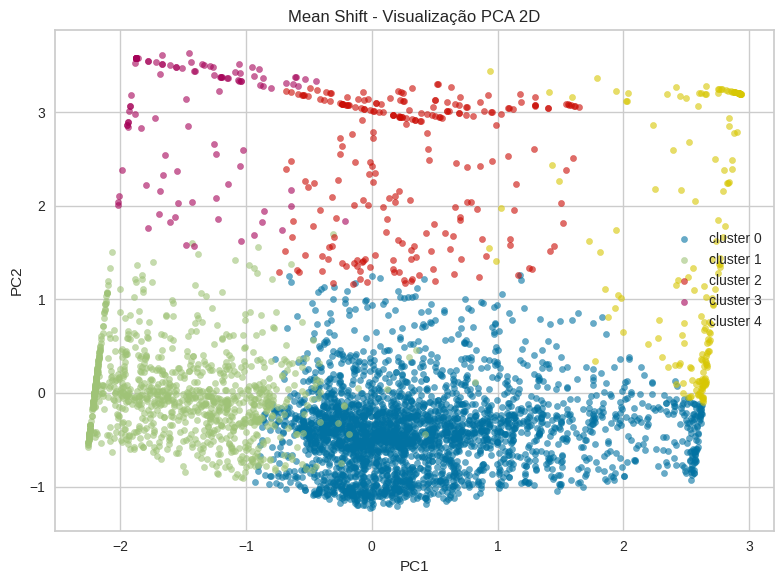

In [91]:
# Realizando a visualização PCA 2D do Mean Shift
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_rfm_clip_scaled)

plt.figure(figsize=(8,6))
for lab in np.unique(ms_labels):
    mask = ms_labels == lab
    plt.scatter(df_pca[mask,0], df_pca[mask,1], label=f'cluster {lab}', s=20, alpha=0.6)
plt.legend(loc='best'); plt.title('Mean Shift - Visualização PCA 2D'); plt.xlabel('PC1'); plt.ylabel('PC2'); plt.tight_layout(); plt.show()


In [92]:
# Realizando a sumarização RFM por cluster
rfm_summary = df_rfm_clip.copy()
rfm_summary['cluster_ms'] = ms_labels
summary = rfm_summary.groupby('cluster_ms').agg(['count','mean','median','std'])
summary

R                                   F                    \
           count        mean median        std count       mean median   
cluster_ms                                                               
0           2819   61.991486   52.0  33.526680  2819   3.930472    3.0   
1            998  257.201403  260.0  58.222229   998   1.556112    1.0   
2            235   79.182979   72.0  42.735878   235   2.821277    2.0   
3            108  275.407407  284.5  50.022058   108   1.472222    1.0   
4            176   39.289773   29.5  28.232324   176  12.443182   13.0   

                         M                                   
                 std count       mean     median        std  
cluster_ms                                                   
0           3.127658  2819  17.079782  16.824000   9.093952  
1           1.122559   998  17.545732  16.770227   9.094038  
2           1.939792   235  78.199304  88.270000  15.319278  
3           0.911590   108  81.212284  91.768421  13.686030  
4           1.189074   176  54.963401  47.685649  27.417046


## Relatório Etapa 03

Nesta etapa foram aplicados e comparados diferentes algoritmos de clusterização com o objetivo de identificar grupos de clientes com comportamentos de compra semelhantes com base nas variáveis Recência (R), Frequência (F) e Monetário (M).

**K-Means**

*  O algoritmo K-Means foi o primeiro modelo testado. A quantidade ideal de clusters foi definida com base na análise do método Elbow e na avaliação do Silhouette Score, resultando em 4 clusters como configuração mais adequada.
*  O modelo apresentou boa separação entre os grupos, com valores de Silhouette indicando uma estrutura de agrupamento coerente.
*  Os clusters mostraram perfis distintos, sendo possível identificar clientes de alta frequência e gasto, clientes ocasionais e clientes inativos há mais tempo.

**Clusterização Hierárquica**

*  Em seguida, foi aplicada a Clusterização Hierárquica, utilizando o método de ligação Ward, que minimiza a variância intra-grupo.
*  O dendrograma auxiliou na identificação visual dos níveis de agrupamento, sugerindo também 4 clusters principais, o que reforça a consistência dos resultados obtidos pelo K-Means.
*  Os agrupamentos apresentaram uma segmentação similar, porém com uma leve sobreposição em pontos de fronteira, algo esperado por se tratar de um método determinístico baseado em distâncias.

**DBSCAN**

*  O modelo DBSCAN foi testado com parâmetros básicos (eps=0.5, min_samples=5).
*  O algoritmo conseguiu identificar regiões densas no espaço de dados e diferenciar alguns grupos de clientes com comportamento mais homogêneo.
*  No entanto, observou-se a formação de um número reduzido de clusters e uma quantidade considerável de pontos classificados como ruído (label = -1).
*  Apesar de interessante para detectar clientes “fora do padrão” (outliers comportamentais), o DBSCAN apresentou menor desempenho geral em termos de Silhouette Score, sendo menos adequado para essa base.

**Mean Shift**

*  O algoritmo Mean Shift, por sua vez, estimou automaticamente o número de clusters a partir da densidade de pontos.
*  O modelo apresentou resultados intermediários, conseguindo separar grupos coerentes, mas com tempo de processamento maior e alguns clusters com poucos clientes.
*  O desempenho foi inferior ao K-Means em termos de separação e interpretabilidade dos grupos, embora também tenha identificado padrões relevantes.

**Resumo da Etapa 3**

*  Os quatro modelos de clusterização foram aplicados e avaliados.
Os métodos K-Means e Hierárquico apresentaram os melhores resultados em termos de consistência dos agrupamentos e interpretação dos perfis de clientes, demonstrando maior adequação ao objetivo do estudo — segmentar a base de clientes para ações de marketing personalizadas.


# Etapa 04) Análise dos clusters obtidos


In [47]:
# Análise de perfis por cluster

# KMeans
df_rfm_clip['cluster_kmeans'] = kmeans_labels
perfil_kmeans = df_rfm_clip.groupby('cluster_kmeans')[['R', 'F', 'M']].mean().round(2)
print('Perfis dos clusters - KMeans')
display(perfil_kmeans)

# Hierárquico
df_rfm_clip['cluster_hclust'] = hclust_labels
perfil_hclust = df_rfm_clip.groupby('cluster_hclust')[['R', 'F', 'M']].mean().round(2)
print('Perfis dos clusters - Hierárquico')
display(perfil_hclust)

# DBSCAN (ignora ruído = -1)
df_rfm_clip['cluster_dbscan'] = db_labels
perfil_dbscan = df_rfm_clip[df_rfm_clip['cluster_dbscan'] != -1].groupby('cluster_dbscan')[['R', 'F', 'M']].mean().round(2)
print('Perfis dos clusters - DBSCAN (sem ruído)')
display(perfil_dbscan)

# Mean Shift
df_rfm_clip['cluster_meanshift'] = ms_labels
perfil_meanshift = df_rfm_clip.groupby('cluster_meanshift')[['R', 'F', 'M']].mean().round(2)
print('Perfis dos clusters - Mean Shift')
display(perfil_meanshift)


Perfis dos clusters - KMeans


,R,F,M
cluster_kmeans,,,
0,261.20,1.51,18.03
1,41.52,10.19,20.43
2,67.53,2.70,17.11
3,121.32,3.86,80.50


Perfis dos clusters - Hierárquico


,R,F,M
cluster_hclust,,,
0,60.16,3.55,17.88
1,35.19,12.50,31.85
2,132.37,2.38,78.24
3,244.43,1.64,17.03


Perfis dos clusters - DBSCAN (sem ruído)


,R,F,M
cluster_dbscan,,,
0,111.86,3.58,23.45


Perfis dos clusters - Mean Shift


,R,F,M
cluster_meanshift,,,
0,61.99,3.93,17.08
1,257.20,1.56,17.55
2,79.18,2.82,78.20
3,275.41,1.47,81.21
4,39.29,12.44,54.96


## Relatório Etapa 04
Após a análise comparativa, o modelo K-Means foi escolhido como o mais adequado para representar o comportamento dos clientes.

Justificativas para a escolha:

1. Apresentou maior valor de Silhouette, indicando boa separação entre os grupos.

2. Formou clusters de tamanho equilibrado, facilitando a interpretação e aplicação de estratégias distintas.

3. A distribuição dos clientes por cluster mostrou padrões consistentes com as variáveis RFM, permitindo identificar claramente:

*  Clientes recentes e de alto valor (alto gasto e frequência);

*  Clientes leais, com alta frequência, mas gasto médio;

*  Clientes ocasionais, com baixa frequência e recência intermediária;

*  Clientes inativos, com alta recência e baixo gasto.

O modelo hierárquico apresentou resultados próximos, mas com fronteiras menos nítidas e sobreposição entre grupos.
Já os modelos DBSCAN e Mean Shift apresentaram limitações na separação e interpretabilidade, sendo menos indicados para segmentações estratégicas.


# Etapa 05) Interpretação dos resultados obtidos


In [94]:
# Ajustando a variável 'Cluster' para as análises
df_rfm_clip['cluster'] = kmeans.labels_

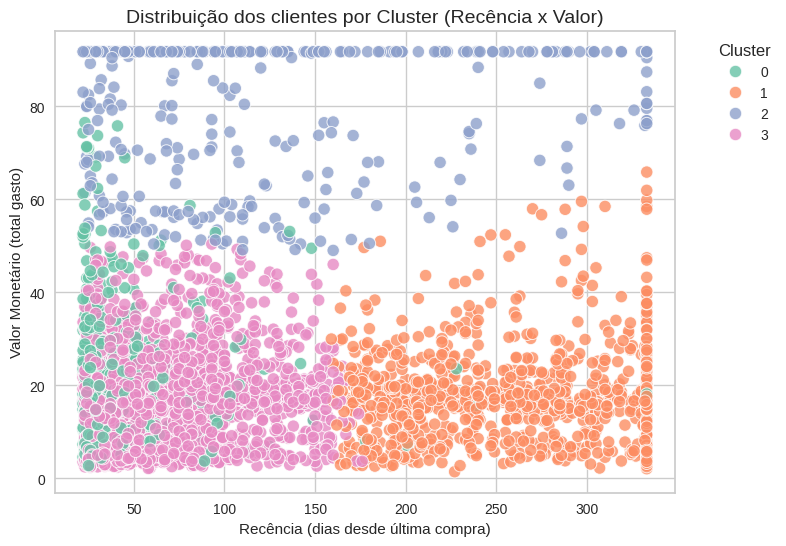

In [95]:
# Criando um Gráfico de Dispersão para a análise R x M
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_rfm_clip,
    x='R',
    y='M',
    hue='cluster',
    palette='Set2',
    s=80,
    alpha=0.8
)
plt.title('Distribuição dos clientes por Cluster (Recência x Valor)', fontsize=14)
plt.xlabel('Recência (dias desde última compra)')
plt.ylabel('Valor Monetário (total gasto)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1))
plt.show()

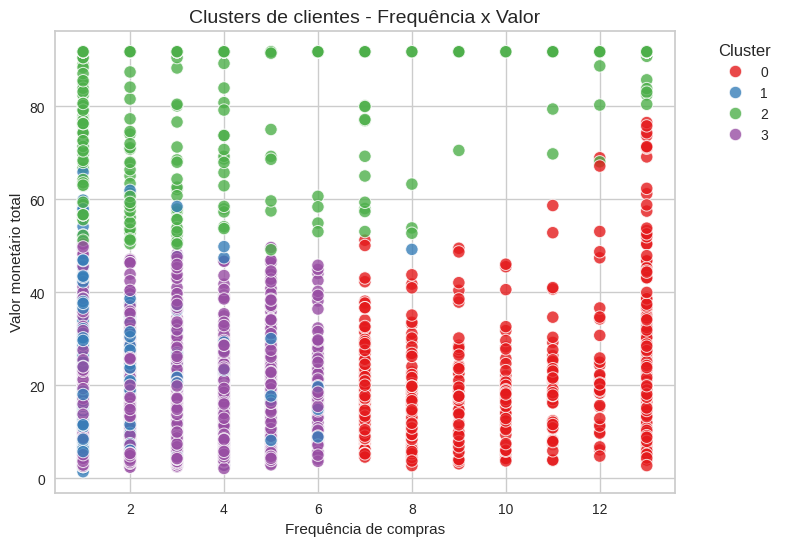

In [96]:
# Criando um Gráfico de Dispersão para a análise F x M

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_rfm_clip,
    x='F',
    y='M',
    hue='cluster',
    palette='Set1',
    s=80,
    alpha=0.8
)
plt.title('Clusters de clientes - Frequência x Valor', fontsize=14)
plt.xlabel('Frequência de compras')
plt.ylabel('Valor monetário total')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1))
plt.show()

<Figure size 800x500 with 0 Axes>

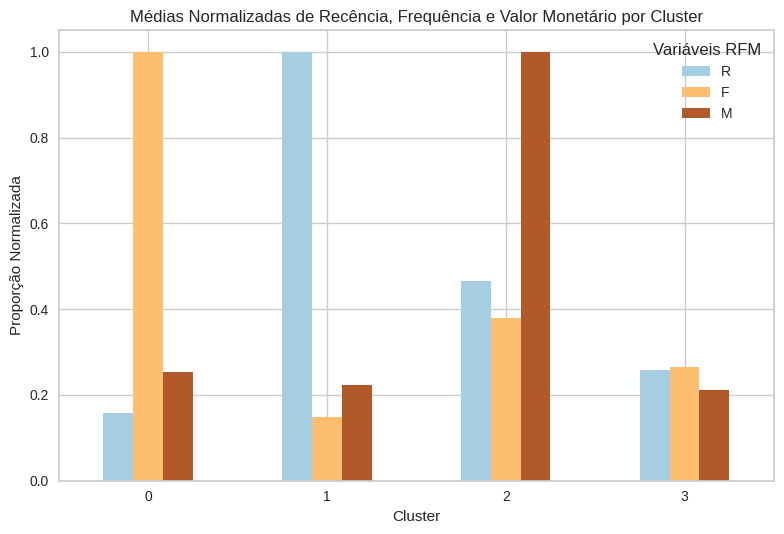

In [99]:
# Criando um gráfico comparativo entra as médiasdas métricas RFM para cada Cluster
perfil_clusters = df_rfm_clip.groupby('cluster')[['R','F','M']].mean()
perfil_norm = perfil_clusters / perfil_clusters.max()

plt.figure(figsize=(8,5))
perfil_norm.plot(kind='bar', colormap='Paired')
plt.title('Médias Normalizadas de Recência, Frequência e Valor Monetário por Cluster')
plt.ylabel('Proporção Normalizada')
plt.xlabel('Cluster')
plt.legend(title='Variáveis RFM')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Relatório Etapa 05

Com base no modelo K-Means (4 clusters) e na análise das médias normalizadas de Recência (R), Frequência (F) e Valor Monetário (M) apresentadas no gráfico, foi possível identificar os seguintes perfis de clientes:

| **Cluster**   | **Perfil**                            | **Características Principais**                                                                                                                                                                                                             |
| ------------- | ------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Cluster 0** | **Clientes Frequentes e Ativos**      | Apresentam **alta frequência de compras**, compram **recentemente** (baixa recência) e têm **valor monetário intermediário**. São clientes que mantêm relacionamento constante com a marca, representando grande potencial de fidelização. |
| **Cluster 1** | **Clientes Inativos**                 | Possuem **alta recência** (fazem muito tempo que não compram), **baixa frequência** e **baixo gasto médio**. Indicam **risco de churn** e devem ser foco de ações de **reativação**.                                                       |
| **Cluster 2** | **Clientes Premium / Alto Valor**     | Apresentam **valor monetário muito alto**, frequência e recência intermediárias. São responsáveis por grande parte da **receita total**, embora não comprem com tanta frequência. Representam o grupo de **maior valor estratégico**.      |
| **Cluster 3** | **Clientes Regulares de Baixo Valor** | Mantêm **níveis equilibrados** entre R, F e M, mas todos em **patamar baixo**. São clientes que compram ocasionalmente, sem grande impacto individual no faturamento, mas relevantes em volume.                                            |

**Recomendações de Ações**

1.  Cluster 0 – Clientes Frequentes e Ativos:

*  Reforçar a fidelização com programas de pontos e ofertas exclusivas.

*  Estimular aumento no ticket médio com combos e descontos progressivos.

2.  Cluster 1 – Clientes Inativos:

*  Implementar campanhas de reengajamento, como e-mails personalizados com cupons de retorno.

*  Oferecer descontos agressivos para reconquistar clientes inativos há mais tempo.

3.  Cluster 2 – Clientes Premium:

*  Criar benefícios VIP (frete grátis, acesso antecipado a lançamentos).

*  Monitorar individualmente o comportamento para evitar perda de clientes valiosos.

4.  Cluster 3 – Clientes Regulares de Baixo Valor:

*  Direcionar ofertas simples e de baixo custo, estimulando aumento na frequência.

*  Enviar comunicações automatizadas com sugestões personalizadas de produtos.

**Conclusão**

A clusterização permitiu identificar perfis de clientes distintos, possibilitando que a empresa personalize suas campanhas de marketing de acordo com o comportamento de compra de cada grupo.
O modelo K-Means demonstrou ser o mais adequado, por gerar clusters claros, equilibrados e facilmente interpretáveis, atendendo aos objetivos de segmentação propostos no desafio.